# Steps in OCR

1- Convert image to gray-scale.

2- apply filter no remove noise, such as "bilteral filter".

3- Apply threshold using Canny Edge detection.

4- Apply Contour.

5- Find the Countour "has 4 points and must be connected together" that is look like rectangle. Why? Most of the plates cars has rectangle shape, which is distinct among the different shapes in the car.

Note in #5: Poly Function is used.

In [192]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imutils
import easyocr #There is Error in Importing easyocr in Jupyter notebook,run the code in VS code.

# 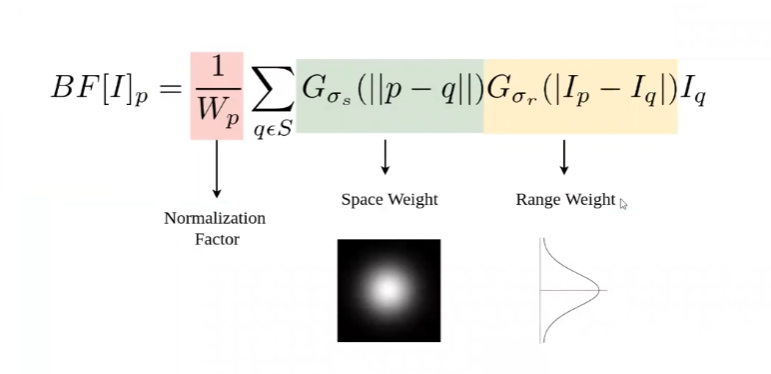

Biltara Filter Equation

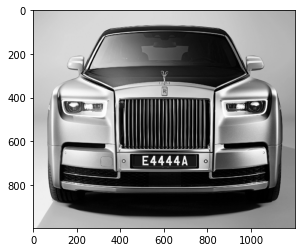

In [193]:
img = cv2.imread("Data/Car plate.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)) #When displaying image in plt library,
#it must be converted as RGB.

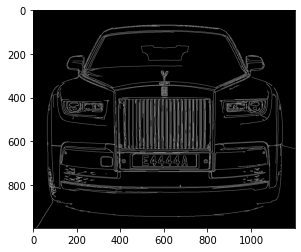

In [194]:
btfiler = cv2.bilateralFilter(gray, 11,17,17) #Noise Reduction
                        #when we increase the distance paramerter "11", the edges will be good more
edged = cv2.Canny(btfiler, 30,200) #Edge Detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [195]:
keyPoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contourss = imutils.grab_contours(keyPoints)
contours = sorted(contourss, key = cv2.contourArea, reverse=True)[:10] #10 to search for the first 10 countors
#print(contours)
#len(contours) #=10

In [196]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True) #go back to the video or read documentation about this function
    if len(approx) == 4:
        location = approx
        break
        
print(location)

[[[444 661]]

 [[446 725]]

 [[760 722]]

 [[758 659]]]


In [197]:
location

array([[[444, 661]],

       [[446, 725]],

       [[760, 722]],

       [[758, 659]]], dtype=int32)

In [198]:
approx[1][0][1]

725

In [199]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255,-1)


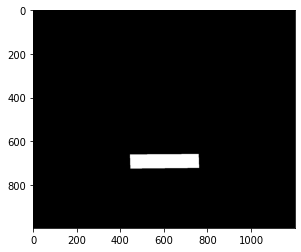

In [200]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

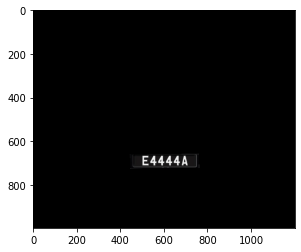

In [201]:
new_image = cv2.bitwise_and(img, img, mask = mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [202]:
(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x),np.min(y)) #to find the top left and bottom right
(x2,y2) = (np.max(x),np.max(y)) #to find the top right and bottom left
cropped_image = gray[x1:x2+1, y1:y2+1]

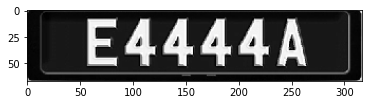

In [203]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [204]:
reader = easyocr.Reader(["en"]) 
#easyocr library support many langauges, even the Arabic Language
result = reader.readtext(cropped_image)
result #the result will show the plate number and the accuracy
#Also, the result will be in list, the -1 index in the list is the accuracy
#and -2 index in the list is the plate number

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[51, 1], [273, 1], [273, 63], [51, 63]], 'E4444A', 0.8928305591609024)]

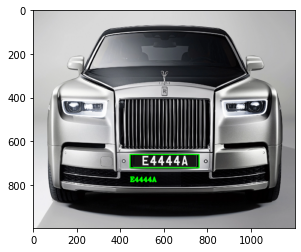

In [206]:
text = result[0][-2] #this is index from the result in the above cell, -2 means will go to index -2 in the list of the result
font = cv2.FONT_HERSHEY_COMPLEX
res = cv2.putText(img, text=text, org = (approx[0][0][0], approx[1][0][1]+60), fontFace= font,fontScale= 1, color= (0,255,0), thickness=3,lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))